<a href="https://colab.research.google.com/github/JeanMusenga/2nd_semester_individual_assignments/blob/main/ARPs_non_ARPs_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
#from imblearn.over_sampling import RandomOverSampler

In [ ]:
dataset=pd.read_excel('ARPs_and_ProgrammingPosts.xlsx')

In [ ]:
dataset.head()

,Post,Class
0,<p>Here's the architecture:</p>\n<ol>\n<li>Inp...,1
1,<p>I am confused about the architecture of Raz...,1
2,<p>I have some spring boot microservices and I...,1
3,<p>I'm trying to properly design an applicatio...,1
4,<p>I heard that for .NET8 Microsoft gifted us ...,1


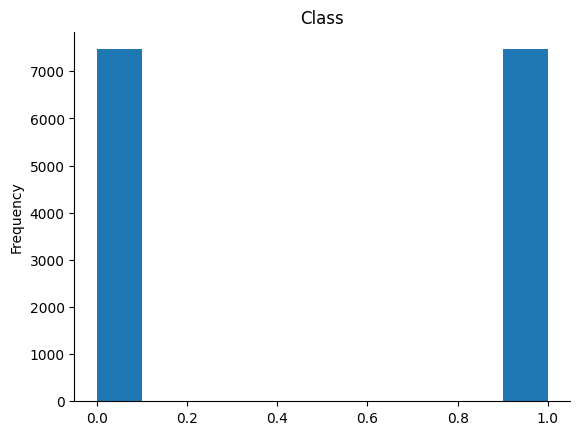

In [ ]:
# @title Class

from matplotlib import pyplot as plt
dataset['Class'].plot(kind='hist', bins=10, title='Class')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
dataset.columns

Index(['Post', 'Class'], dtype='object')

In [ ]:
dataset.Class

0        1
1        1
2        1
3        1
4        1
        ..
14927    0
14928    0
14929    0
14930    0
14931    0
Name: Class, Length: 14932, dtype: int64

In [ ]:
##dataset["class"] = (dataset["Class"] == "g").astype(int)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14932 entries, 0 to 14931
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Post    14932 non-null  object
 1   Class   14932 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 233.4+ KB


In [ ]:
dataset[dataset['Class'] ==1].count()

Post     7466
Class    7466
dtype: int64

In [ ]:
dataset[dataset['Class'] ==0].count()

Post     7466
Class    7466
dtype: int64

In [ ]:
dataset.Post[300]

'<p>I m trying to design a Platform which can have multiple Publishers and Consumers. It can expose the Layer on REST API as well as GRAPHQL.\nNow if we want to have an Orchestration or Workflow layer which supports following things</p>\n<ol>\n<li>SAGA base Message Processing.</li>\n<li>REST API based Step by Step execution</li>\n<li>REST API based Orchestration</li>\n</ol>\n<p>with keeping all the Microservices decoupled and Transformation; Routing done through the Workflow/Orchestrator itself.\nAny Tool or Framework in market can help such as NETFLIX Conductor. Need Suggestions on this how can move forward.</p>\n<p>At the end it needs to</p>\n<ol>\n<li>Easy to Configure -- while adding new API; New services.</li>\n<li>Support Observailibility</li>\n<li>Plug and Play configuration</li>\n<li>Things such as Service discovery and Cloud Agnostic if required</li>\n</ol>\n'

In [ ]:
x = dataset.Post
y = dataset['Class']

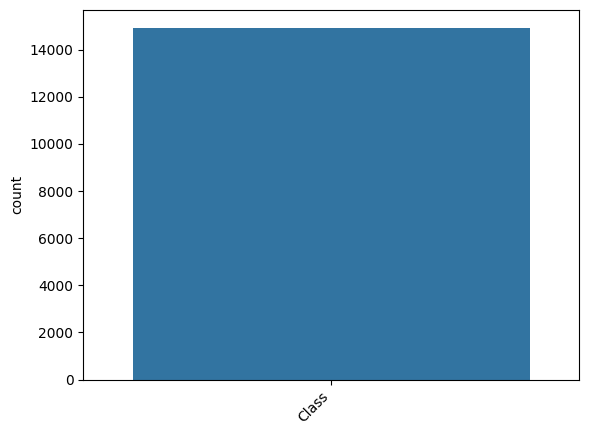

In [ ]:
import seaborn as sns
sns.countplot(data=dataset)
plt.xticks(rotation=45, ha='right');

In [ ]:
dataset.drop_duplicates(subset ="Post", keep = False, inplace = True)

In [ ]:
dataset.duplicated(subset='Post').value_counts()

False    14918
Name: count, dtype: int64

In [ ]:
#split X and y into training and testing sets
#train, valid, test = np.split(dataset.sample(frac=1), [int(0.6*len(dataset)), int(0.8*len(dataset))])
x = dataset.Post
y = dataset.Class

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.33, random_state=125)


print('Total number of sample:', len(dataset))
# check the shape of X_train and X_test
print('X Training sample:', len(X_train))
print('X Test sample:', len(X_test))

# check the shape of y_train and y_test
print("-------------------------")
print('Y Training sample:', len(y_train))
print('Y Test sample:', len(y_test))

Total number of sample: 14932
X Training sample: 10004
X Test sample: 4928
-------------------------
Y Training sample: 10004
Y Test sample: 4928


In [ ]:
dataset.shape #I have 14918 instances/posts and 2 attributes/columns in the dataset.

(14932, 2)

In [ ]:
X_train.dtypes


dtype('O')

In [ ]:
# check data types in y_train
y_train.dtypes

dtype('float64')

In [ ]:
#Feature Engineering or feature generation/extraction is the process of transforming raw data into useful features that help us to understand
#our model better and increase its predictive power. I will carry out feature engineering on different types of variables.
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer().fit(X_train) #CountVectorizer implements both tokenization and occurrence counting in a single class
X_train_vect = vect.transform(X_train)
X_test_vect = vect.transform(X_test)


In [ ]:
print("X_train:\n{}".format(repr(X_train_vect)))

X_train:
<10004x76211 sparse matrix of type '<class 'numpy.int64'>'
	with 978772 stored elements in Compressed Sparse Row format>


In [ ]:
vect.get_feature_names_out()

array(['00', '000', '0000', ..., 'œï¼', 'œˆ', 'šã'], dtype=object)

# kNN

In [ ]:
#X.toarray()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_vect, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test_vect)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      2544
           1       0.87      0.99      0.93      2384

    accuracy                           0.92      4928
   macro avg       0.93      0.92      0.92      4928
weighted avg       0.93      0.92      0.92      4928



# Logistic Regression-

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression(C=5, penalty='l1', solver='liblinear')
lg_model = lg_model.fit(X_train_vect, y_train)

In [ ]:
y_pred = lg_model.predict(X_test_vect)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2544
           1       0.95      0.96      0.96      2384

    accuracy                           0.96      4928
   macro avg       0.96      0.96      0.96      4928
weighted avg       0.96      0.96      0.96      4928



# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train_vect, y_train)

In [ ]:
y_pred = svm_model.predict(X_test_vect)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2544
           1       0.94      0.99      0.96      2384

    accuracy                           0.96      4928
   macro avg       0.96      0.96      0.96      4928
weighted avg       0.96      0.96      0.96      4928



# Neural Net

In [ ]:
import tensorflow as tf